In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [4]:
 
df = pd.read_csv("owid-covid-data.csv")

In [6]:

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [7]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54545,ZWE,Africa,Zimbabwe,2020-12-12,11219.0,57.0,86.000,307.0,1.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
54546,ZWE,Africa,Zimbabwe,2020-12-13,11246.0,27.0,75.429,307.0,0.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
54547,ZWE,Africa,Zimbabwe,2020-12-14,11358.0,112.0,74.143,309.0,2.0,2.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
54548,ZWE,Africa,Zimbabwe,2020-12-15,11522.0,164.0,87.143,310.0,1.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
54549,ZWE,Africa,Zimbabwe,2020-12-16,11749.0,227.0,106.000,313.0,3.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [9]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.399700e+04,5.380700e+04,52851.000000,4.595700e+04,45783.000000,52851.000000,53683.000000,53494.000000,52543.000000,45656.000000,...,51918.000000,35546.000000,52453.000000,53066.000000,41475.000000,40908.000000,26181.000000,48253.000000,53958.000000,52144.000000
mean,2.386717e+05,2.758356e+03,2736.745336,8.582789e+03,72.023983,61.079062,4002.333869,50.347312,49.809266,109.450500,...,19287.119224,13.091538,255.565124,7.753580,10.600832,32.645208,51.233419,3.047043,73.172424,0.716524
std,2.314547e+06,2.506477e+04,24157.273054,6.739092e+04,517.526436,462.575369,8135.341472,156.821867,123.531168,207.984428,...,19704.554331,19.842096,117.770885,3.853017,10.433646,13.447507,31.779078,2.477148,7.549755,0.153782
min,1.000000e+00,-4.607600e+04,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,3.990000e+02,1.000000e+00,3.857000,2.300000e+01,0.000000,0.000000,82.851000,0.057000,0.718000,4.061000,...,4541.795000,0.500000,164.905000,5.290000,1.900000,21.600000,20.859000,1.300000,67.920000,0.591000
50%,4.052000e+03,3.700000e+01,44.857000,1.280000e+02,1.000000,0.571000,631.069000,4.138000,5.452000,20.383000,...,13111.214000,2.000000,241.219000,7.110000,6.300000,31.400000,50.540000,2.400000,74.620000,0.750000
75%,3.985200e+04,4.130000e+02,444.500000,1.113000e+03,10.000000,7.286000,3988.324000,36.432500,40.043000,100.848000,...,27216.445000,18.900000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.843000
max,7.421035e+07,1.492534e+06,749491.000000,1.648956e+06,13998.000000,11359.714000,96369.637000,9760.898000,2648.773000,1591.137000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [10]:
dfM = df[df['location'].str.contains('Morocco')].reset_index()

In [11]:
dfM = dfM[["date","new_tests","new_cases"]]

In [12]:
dfM.dtypes

date          object
new_tests    float64
new_cases    float64
dtype: object

In [13]:
dfM["date"]= pd.to_datetime(dfM["date"])

In [14]:
dfM.isnull().sum()

date          0
new_tests    27
new_cases    25
dtype: int64

In [15]:
dfM['new_tests'] = dfM['new_tests'].fillna(0)

In [16]:
dfM['new_cases'] = dfM['new_cases'].fillna(0)

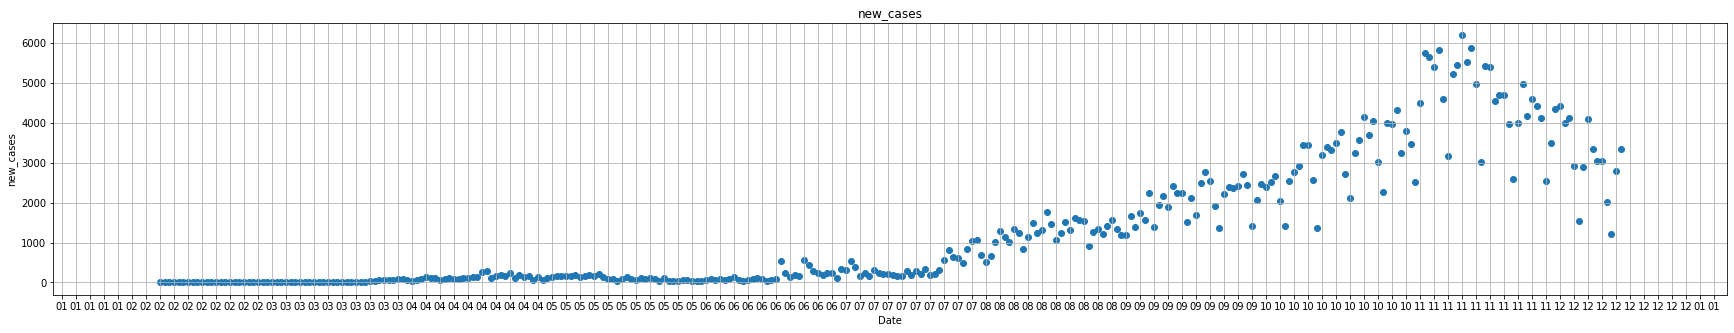

In [20]:
variable = 'new_cases'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(dfM["date"],dfM[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))

plt.show()

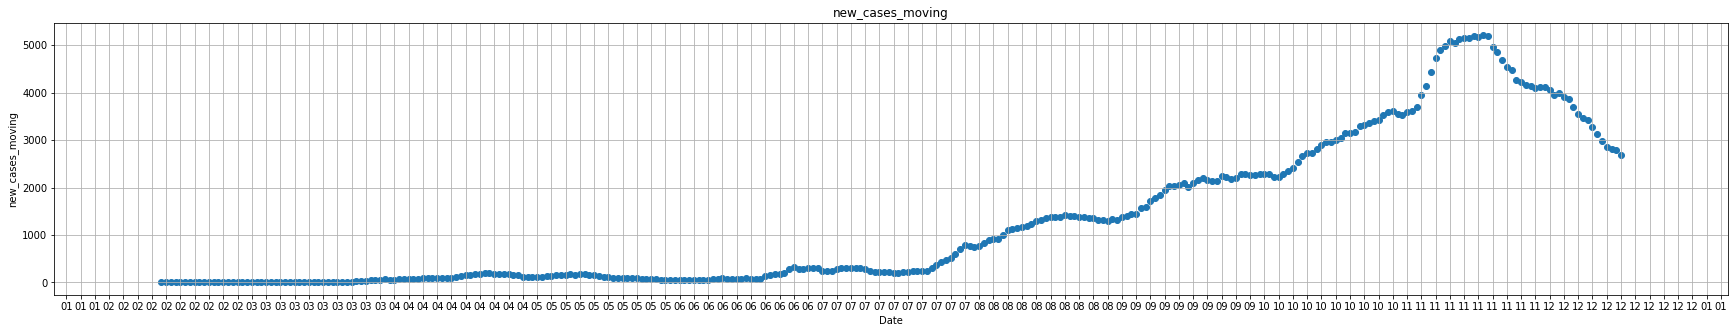

In [21]:
# Correcting biases 
""""A possible methodology for correcting this systematic 
bias consists in the calculation of the moving average, which is normally 
used to analyze time-series by calculating averages of different subsets of the complete dataset, 
in our case 7 days. The first moving average is calculated by averaging the first subset of 7 days, and then the subset 
is changed by moving forward to the next fixed subset, and so on. In general, the moving average smoothens the data,
and it reduces anomalies like our weekend bias."""
rolling_average_days = 7
dfM['new_cases_moving'] = dfM['new_cases'].rolling(window=rolling_average_days).mean()
variable = 'new_cases_moving'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(dfM["date"],dfM[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))

plt.show()


In [22]:
dfM['new_cases_moving'] = dfM['new_cases_moving'].fillna("0")

In [23]:
dfM.head()

,date,new_tests,new_cases,new_cases_moving
0,2020-02-07,0.0,0.0,0
1,2020-02-08,0.0,0.0,0
2,2020-02-09,0.0,0.0,0
3,2020-02-10,0.0,0.0,0
4,2020-02-11,0.0,0.0,0


In [24]:
dfM.tail()

,date,new_tests,new_cases,new_cases_moving
309,2020-12-12,18550.0,3033.0,2979.86
310,2020-12-13,15141.0,2012.0,2850.29
311,2020-12-14,9652.0,1217.0,2805.43
312,2020-12-15,16495.0,2793.0,2790.14
313,2020-12-16,0.0,3351.0,2683.71


In [25]:
dfM.dtypes


date                datetime64[ns]
new_tests                  float64
new_cases                  float64
new_cases_moving            object
dtype: object

In [26]:
dfM["new_cases_moving"] = pd.to_numeric(dfM["new_cases_moving"])

In [27]:
corona_index_df = pd.DataFrame(dfM.index)
corona_confirmed_df = pd.DataFrame(dfM["new_cases_moving"])
x_days_train = corona_index_df[0:238]
x_days_validate = corona_index_df[238:248]
x_days_test = corona_index_df[248:251]


In [30]:
y_confirmed_train = corona_confirmed_df[0:238]
y_confirmed_validate = corona_confirmed_df[238:248]
y_confirmed_test = corona_confirmed_df[248:251]

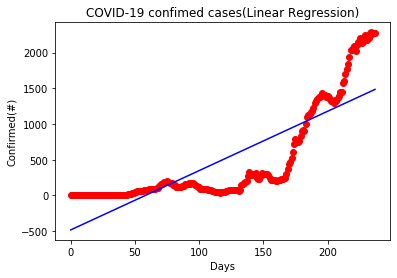

In [31]:
ln_model = LinearRegression()
ln_model.fit(x_days_train, y_confirmed_train)

plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, ln_model.predict(x_days_train), color='blue')
plt.title('COVID-19 confimed cases(Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Confirmed(#)')
plt.show()

In [32]:
print('Linear Regession  R2 Score   : ',
      r2_score(y_confirmed_train, ln_model.predict(x_days_train)))
rmse = np.sqrt(mean_squared_error(
    y_confirmed_train, ln_model.predict(x_days_train)))
print('RMSE of Linear regression is :', rmse)

Linear Regession  R2 Score   :  0.6821468312424566
RMSE of Linear regression is : 389.0317910823276


In [89]:
# Polynomal linear Regression (degree=2)
poly_reg = PolynomialFeatures(degree=2)
# Model training with the train data.
x_poly = poly_reg.fit_transform(x_days_train)
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

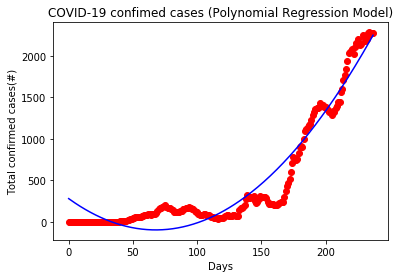

In [90]:
plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, lin_reg.predict(
    poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases (Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases(#)')
plt.show()

In [91]:
y_pred = lin_reg.predict(poly_reg.fit_transform(x_days_validate))
result = pd.DataFrame(y_pred)
result['Real Value'] = y_confirmed_validate.iloc[:, :].values
result['Predicted Value'] = pd.DataFrame(y_pred)
result = result[['Real Value', 'Predicted Value']]
print(result)

    Real Value  Predicted Value
0  2291.857143      2275.382280
1  2283.857143      2303.325506
2  2226.714286      2331.432466
3  2226.857143      2359.703158
4  2295.000000      2388.137585
5  2338.714286      2416.735744
6  2415.571429      2445.497637
7  2547.571429      2474.423264
8  2659.000000      2503.512623
9  2733.142857      2532.765716


In [92]:
print('Polynomial Regession  R2 Score   : ',
      r2_score(y_confirmed_validate, y_pred))
rmse = np.sqrt(mean_squared_error(y_confirmed_validate, y_pred))
print('RMSE of polynomial regression is :', rmse)

Polynomial Regession  R2 Score   :  0.6180294371412681
RMSE of polynomial regression is : 107.05134846691577


In [93]:
y_confirmed_test_pred = lin_reg.predict(poly_reg.fit_transform(x_days_test))
predicted_result = pd.DataFrame(y_confirmed_test_pred)
predicted_result['Real Test Value'] = y_confirmed_test.iloc[:, :].values
predicted_result['Predicted Test Value'] = pd.DataFrame(y_confirmed_test_pred)
predicted_result = predicted_result[[
    'Real Test Value', 'Predicted Test Value']]
print(predicted_result)

   Real Test Value  Predicted Test Value
0      2723.714286           2562.182542
1      2814.000000           2591.763102
2      2901.285714           2621.507395
